In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import altair as alt
from IPython.display import HTML

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/omcreg31/major.html
/kaggle/input/omcreg31/__results__.html
/kaggle/input/omcreg31/state_counts_map.html
/kaggle/input/omcreg31/__notebook__.ipynb
/kaggle/input/omcreg31/__output__.json
/kaggle/input/omcreg31/job.html
/kaggle/input/omcreg31/custom.css
/kaggle/input/omcreg31/__results___files/__results___25_0.png
/kaggle/input/omcreg31/__results___files/__results___7_1.png
/kaggle/input/omcreg31/__results___files/__results___31_0.png
/kaggle/input/omcreg31/__results___files/__results___7_2.png
/kaggle/input/omcreg31/__results___files/__results___5_0.png
/kaggle/input/omcreg31/__results___files/__results___12_1.png
/kaggle/input/omcreg31/__results___files/__results___30_0.png
/kaggle/input/omcreg31/__results___files/__results___10_1.png
/kaggle/input/omcreg31/__results___files/__results___29_0.png
/kaggle/input/omcreg31/__results___files/__results___10_2.png
/kaggle/input/omcreg31/__results___files/__results___28_0.png
/kaggle/input/final1/OMC31.csv
/kaggle/input/omc311/OMC

In [7]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install vl-convert-python

Note: you may need to restart the kernel to use updated packages.


# Data

In [9]:
df = pd.read_csv('/kaggle/input/omc-reg31/OMC31-csv.csv')
df.head()


,Timestamp,Full Name,Address,Address (City),Zipcode,Address (State),Address (Country),Local fellowship or church regularly attended (Name & Location),Email,Phone number (WhatsApp number),...,Check the language(s) you are comfortable with:,"To help better connect you with like-minded people, please tell us a little about your interests and passion.",Other organizations/ministries you are directly involved in (if applicable),"OPEN-MIC: There will be open-mic sessions as well in the end of Friday and Saturdays as well. You will have the opportunity to virtually be on the spotlight for 5 minutes to perform (art, music, poetry), pitch an idea, preach, or other things you can thin",What do you hope to learn from OMC?,"I agree that my name, email, location (city & state) & interests/passion can be used for communication and data collection.",Any initial questions or comments?,"Would you like to donate in addition to your registration cost? If yes, please provide the amount below",Would you like to be anonymous regarding the donation?,First OMC
0,6/4/2024 15:25,Natassja Gloria,"609 Waverly St, Unit 217",Houston,77007.0,TX,USA,Houston’s First Baptist,Natassjaglorias@gmail.com,5.125763e+09,...,Both,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN
1,6/29/2024 16:16,Maria Siswanto,1494 Braeton Parkway 203,Columbus,43235.0,OH,USA,ICF and Lifepoint - Columbus,aileen.siswanto@gmail.com,6.149658e+09,...,Both,NaN,Lifepoint,NaN,NaN,Agree,NaN,NaN,NaN,NaN
2,8/7/2024 13:03,Ray Nidel Sufado Sweny,1935 Ring Rd N 3161 W,Kalamazoo,49008.0,MI,USA,Church of baptism,raysweny88@gmail.com,2.693770e+09,...,Both,I like sport especially football and volleyball,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN
3,6/20/2024 20:39,Melissa Go,5533 larkin st,Houston,NaN,TX,USA,IFGF,Go.m3lissa@gmail.com,8.327135e+09,...,NaN,NaN,NaN,NaN,NaN,Agree,NaN,NaN,NaN,NaN
4,6/6/2024 21:53,Raymond Christian Chahyadi,2894 Heatherleaf Way,Columbus,43231.0,OH,USA,Capital Church,ramyondchahyadi@fica.org,7.313266e+09,...,Both,"Economic Development, Calling/Purpose, Agricul...","FICA, Capital Church",NaN,How do I make an impact here in the US for Indo?,Agree,No,No,No,NaN


## 1. Gender Distribution

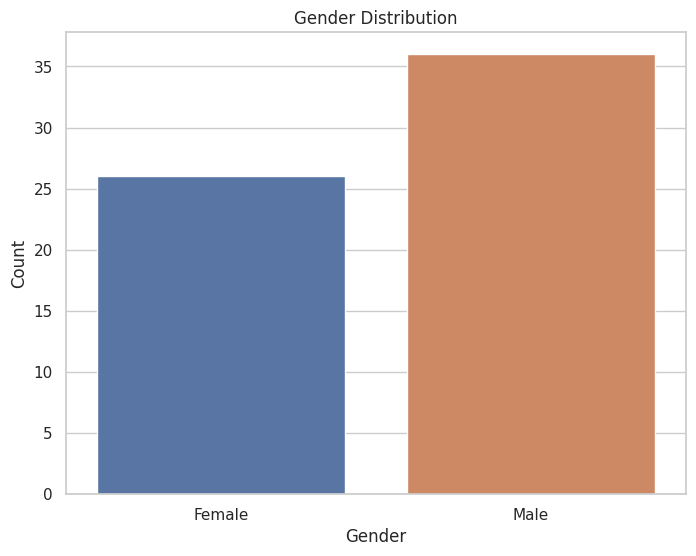

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [11]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
gender_chart = alt.Chart(gender_counts).mark_arc(stroke='white').encode(
    theta=alt.Theta(field="Count", type="quantitative"),
    color=alt.Color('Gender:N', scale=alt.Scale(scheme='set2')),
    tooltip=['Gender', 'Count']
).properties(
    width=500,
    height=400,
    title='Gender Distribution'
).configure_title(
    fontSize=25
).configure_legend(
    titleFontSize=0,
    labelFontSize=20,
    symbolSize=200  
)


gender_chart

alt.Chart(...)

## 2. Status

In [13]:
status_counts = df['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']
status_chart = alt.Chart(status_counts).mark_arc(stroke="white").encode(
    theta=alt.Theta(field="Count", type="quantitative"),
    color=alt.Color('Status:N', scale=alt.Scale(scheme='accent')),
    tooltip=['Status', 'Count']
).properties(
    width=500,
    height=400,
    title='Student vs. Professional'
).configure_title(
    fontSize=25
).configure_legend(
    titleFontSize=16,
    labelFontSize=10,
    symbolSize=200  
)


status_chart

alt.Chart(...)

##### trying to add labels

Text(0, 0.5, '')

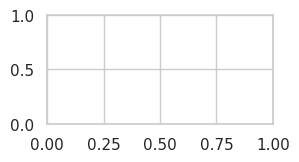

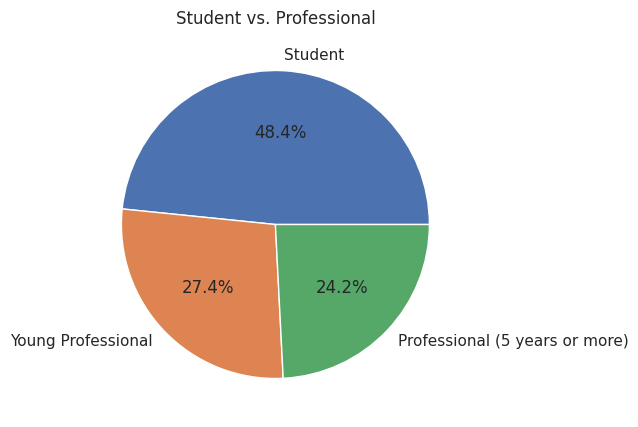

In [14]:
status_counts = df['Status'].value_counts()
status_percentage = status_counts / status_counts.sum() * 100
plt.subplot(3, 2, 2)
plt.figure(figsize=(10, 5))
status_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Student vs. Professional')
plt.ylabel('')

## 3. Job Title

### Top 5

In [24]:
job_counts = df['Job Title'].value_counts().head(5).reset_index()
job_counts.columns = ['Job Title', 'Count']

job_chart = alt.Chart(job_counts).mark_bar().encode(
    x=alt.X(
        'Count:Q', 
        axis=alt.Axis(
            titlePadding=30,
            tickCount=job_counts['Count'].max(),
            tickMinStep=1 
        ),
        scale=alt.Scale(domain=[0, job_counts['Count'].max() + 1]) 
    ),
    y=alt.Y('Job Title:N', sort='-x'),
    tooltip=['Job Title', 'Count'],
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='greens'), legend=None)
).properties(
    width=700,
    height=400,
    title='Top 5 Job Titles'
).configure_axis(
    labelFontSize=16,
    titleFontSize=18
).configure_title(
    fontSize=25
)

job_chart


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


alt.Chart(...)

### All jobs 

In [26]:
job_count1 = df['Job Title'].value_counts().head(30).reset_index()
job_count1.columns = ['Job Title', 'Count']

# Bar Chart
job_chart = alt.Chart(job_count1).mark_bar().encode(
    x=alt.X(
        'Count:Q', 
        axis=alt.Axis(
            title='Count',
            titlePadding=30,
            tickCount=job_count1['Count'].max(),
            tickMinStep=1
        ),
        scale=alt.Scale(domain=[0, job_count1['Count'].max() + 1])
    ),
    y=alt.Y(
        'Job Title:N',
        sort='-x',
        axis=alt.Axis(labelLimit=300, titlePadding=60)
    ),
    tooltip=['Job Title', 'Count'],
    color=alt.Color('Job Title:N', scale=alt.Scale(scheme='pastel1'), legend=None)
).properties(
    width=700,
    height=600,
    title='OMC Job Titles'
).configure_axis(
    labelFontSize=12,
    titleFontSize=18
).configure_title(
    fontSize=25
)

# HTML
html_file = 'job.html'
job_chart.save(html_file, embed_options={'renderer': 'canvas'})

# Link 
HTML(f'<a href="{html_file}" target="_blank">Click here to view or download the chart</a>')


## 4. Major

In [21]:
major_counts = df['Major'].value_counts().head(5).reset_index()
major_counts.columns = ['Major', 'Count']

# Graph
major_chart = alt.Chart(major_counts).mark_bar().encode(
    x=alt.X(
        'Count:Q', 
        axis=alt.Axis(
            titlePadding=30,
            tickCount=major_counts['Count'].max(),
            tickMinStep=1
        ),
        scale=alt.Scale(domain=[0, major_counts['Count'].max() + 1])
    ),
    y=alt.Y(
        'Major:N', 
        sort='-x', 
        axis=alt.Axis(labelLimit=300, titlePadding=60)
    ),
    tooltip=['Major', 'Count'],
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='greens'), legend=None)
).properties(
    width=700,
    height=400,
    title='Top 5 Majors in OMC'
).configure_axis(
    labelFontSize=16,
    titleFontSize=18
).configure_title(
    fontSize=25
)

major_chart


alt.Chart(...)

In [27]:
major_count1 = df['Major'].value_counts().head(40).reset_index()
major_count1.columns = ['Major', 'Count']

# Step 2: Build the bar chart
major_chart1 = alt.Chart(major_count1).mark_bar().encode(
    x=alt.X(
        'Count:Q', 
        axis=alt.Axis(
            title='Count',
            titlePadding=30,
            tickCount=major_count1['Count'].max(),
            tickMinStep=1
        ),
        scale=alt.Scale(domain=[0, major_count1['Count'].max() + 1])
    ),
    y=alt.Y(
        'Major:N',
        sort='-x',
        axis=alt.Axis(labelLimit=300, titlePadding=60)
    ),
    tooltip=['Major', 'Count'],
    color=alt.Color('Major:N', scale=alt.Scale(scheme='set3'), legend=None)
).properties(
    width=700,
    height=600,
    title='Majors Distribution in OMC'
).configure_axis(
    labelFontSize=12,
    titleFontSize=18
).configure_title(
    fontSize=25
)

# HTML
html_file = 'major.html'
major_chart1.save(html_file, embed_options={'renderer': 'canvas'})

# Link
HTML(f'<a href="{html_file}" target="_blank">Click here to view or download the major chart</a>')


## 5. Language Preference

In [28]:
languages_column = 'Check the language(s) you are comfortable with:'
language_data = df[languages_column].dropna().str.get_dummies(sep=',')
language_counts = language_data.sum().reset_index()
language_counts.columns = ['Language', 'Count']
language_chart = alt.Chart(language_counts).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Language:N', sort='-x', axis=alt.Axis(title=None)),
    tooltip=['Language', 'Count'],
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='blues'), legend=None)
).properties(
    height=200,
    width=500,
    title='Language Preference'
).configure_axis(
    labelFontSize=16,
    titleFontSize=18
).configure_title(
    fontSize=25
)
language_chart

alt.Chart(...)

## 6. State Attendees Map

In [30]:
import urllib.request
import json
from vega_datasets import data

state_counts = df['Address (State)'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

state_names = pd.DataFrame({
    'State': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    'id': [1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56]
})
state_counts = pd.merge(state_counts, state_names, on='State', how='left')

# TopoJSON data
url = data.us_10m.url
with urllib.request.urlopen(url) as response:
    us_topojson = json.load(response)

states = alt.Data(values=us_topojson, format=alt.DataFormat(type='topojson', feature='states'))

# Base Map
states_map = alt.Chart(states).mark_geoshape(
    stroke='white',
    fill='lightgrey'
).properties(
    width=800,
    height=500,
    title="OMC Attendees Across US States"
).project('albersUsa')

# State Overlays
states_map += alt.Chart(states).mark_geoshape(
    stroke='white'
).encode(
    color='Count:Q',
    tooltip=['State:N', 'Count:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_counts, 'id', ['State', 'Count'])
).project(
    'albersUsa'
).properties(
    width=800,
    height=500
)

# HTML
html_file = 'state_counts_map.html'
states_map.save(html_file, embed_options={'renderer': 'canvas'})

# Link
HTML(f'<a href="{html_file}" target="_blank">Click here to view or download the map</a>')


## 7. Relationship Status

In [31]:
rel_column = 'How many people are you registering for?'
rel_data = df[rel_column].dropna()
rel_counts = rel_data.value_counts().reset_index()
rel_counts.columns = ['Status', 'Count']
rel_chart = alt.Chart(rel_counts).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Status:N', sort='-x', axis=alt.Axis(title=None)),
    tooltip=['Status', 'Count'],
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='greens'), legend=None)
).properties(
    height=200,
    width=800,
    title='Relationship Status'
).configure_axis(
    labelFontSize=16,
    titleFontSize=18
).configure_title(
    fontSize=25
)
rel_chart



alt.Chart(...)

# Dashboard

In [52]:
# Gender
gender2= df['Gender'].value_counts().reset_index()
gender2.columns = ['Gender', 'Count']
gender_chart3 = alt.Chart(gender2).mark_arc().encode(
    theta=alt.Theta(field="Count", type="quantitative"),
    color=alt.Color(field="Gender", type="nominal"),
    tooltip=['Gender', 'Count']
).properties(
    title='Gender Distribution'
)

# Status
status2= df['Status'].value_counts().reset_index()
status2.columns = ['Status', 'Count']
status_chart3 = alt.Chart(status2).mark_arc().encode(
    theta=alt.Theta(field="Count", type="quantitative"),
    color=alt.Color(field="Status", type="nominal"),
    tooltip=['Status', 'Count']
).properties(
    title='Student vs. Professional'
)

# Top 5 Job title distribution
job_title2 = df['Job Title'].value_counts().head(5).reset_index()
job_title2.columns = ['Job Title', 'Count']
job_title_chart3 = alt.Chart(job_title2).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Job Title:N', sort='-x'),
    tooltip=['Job Title', 'Count'],
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='reds'), legend=None)
).properties(
    title='Top 5 Job Titles'
)

# Top 5 Major distribution
major2 = df['Major'].value_counts().head(5).reset_index()
major2.columns = ['Major', 'Count']
major_chart3 = alt.Chart(major2).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Major:N', sort='-x'),
    tooltip=['Major', 'Count'],
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='blues'), legend=None)
).properties(
    title='Top 5 Majors'
)

# Language
languages_column = 'Check the language(s) you are comfortable with:'
language_data = df[languages_column].dropna().str.get_dummies(sep=',')
language_counts = language_data.sum().reset_index()
language_counts.columns = ['Language', 'Count']
language_chart = alt.Chart(language_counts).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Language:N', sort='-x'),
    tooltip=['Language', 'Count'],
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='greens'))
).properties(
    title='Language Comfort'
)

# Display all charts together
(gender_chart3 | status_chart3) & (job_title_chart3 | major_chart3).resolve_scale(color='independent') & language_chart


alt.VConcatChart(...)